###  Cargamos las librerias necesarias

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime
plt.rcParams["figure.figsize"]=15,10

## Cargamos los datos

In [2]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv"
data = pd.read_csv(url, error_bad_lines=False)
data = data.rename(columns={"Fecha": "Item"}) #Le cambiamos el nombre a la columna
data

,Item,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14
0,Casos nuevos con sintomas,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,6.0,...,1317,893,1343,1183,1004,1406,975,1479,2152,2301
1,Casos totales,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,23.0,...,22016,23048,24581,25972,27219,28866,30063,31721,34381,37040
2,Casos recuperados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10710,11189,11664,12160,12667,13112,13605,14125,14865,15655
3,Fallecidos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,275,281,285,294,304,312,323,335,346,368
4,Casos activos,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,23.0,...,11031,11578,12632,13518,14248,15442,16135,17261,19170,21017
5,Casos nuevos sin sintomas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56,139,190,208,243,241,222,179,508,358
6,Casos nuevos totales,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,6.0,...,1373,1032,1533,1391,1247,1647,1197,1658,2660,2659


In [3]:
fallecidos  = data[data["Item"]=="Fallecidos"].values.tolist()[0][1:]
contagiados = data[data["Item"]=="Casos totales"].values.tolist()[0][1:]
df_letalidad = pd.DataFrame({
    'fecha': data.columns[1:],
    'contagiados': contagiados,
    'fallecidos': fallecidos
})
df_letalidad["letalidad"] = (df_letalidad["fallecidos"] / df_letalidad["contagiados"]) * 100

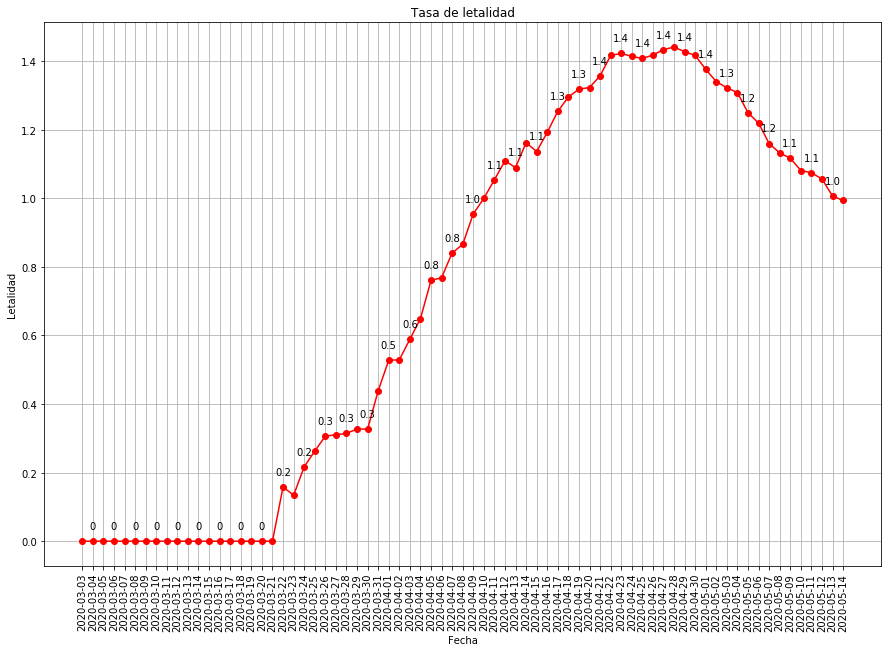

In [4]:
def labelonbars(X, Y):
    n       = len(X)
    aux = 0
    for i in range (n):
        if float(Y[i]) == 0.0 :
            number = "0"
        else:
            number = '{0:.1f}'.format(float(Y[i])).replace(',', '.')
            
        if aux == 1:    
            plt.annotate(
                number, xy=(X[i], Y[i]),
                xytext =(0, 10),
                textcoords="offset points",
                ha ='center', va='bottom',
                size='10')
            aux = 0
        else: 
            aux = 1
        
        

Y            = df_letalidad["letalidad"].values.tolist()
X            = data.columns[1:]
plt.plot(X, Y, 'ro-')
labelonbars(X, Y)
plt.xlabel('Fecha')
plt.ylabel('Letalidad')
plt.title('Tasa de letalidad')
plt.grid()
plt.xticks(X, rotation='vertical')
plt.show()

# Tasa de letalidad por regiones

In [5]:
url_region  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv"
data_region = pd.read_csv(url_region)
data_region

,Region,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
0,2020-03-03,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2020-03-04,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,3
2,2020-03-05,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,4
3,2020-03-06,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,5
4,2020-03-07,0,0,0,0,0,0,4,0,2,0,0,0,0,1,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2020-05-10,340,520,978,124,135,933,20353,195,441,812,899,1454,206,575,8,893,28866
69,2020-05-11,351,547,1014,133,140,970,21317,216,454,814,932,1466,208,592,8,901,30063
70,2020-05-12,351,578,1109,134,148,1029,22709,224,466,826,942,1482,211,594,8,910,31721
71,2020-05-13,359,615,1216,139,153,1123,24965,248,485,839,975,1495,212,628,8,921,34381


In [6]:
date = str(datetime.date.today())

In [7]:
contagiados_total_region = data_region[data_region["Region"]== date].values.tolist()[0][1:]
regiones = data_region.columns.tolist()[1:]

In [8]:
df_letalidad_regiones = pd.DataFrame({
    'Region': regiones,
    'contagiados': contagiados_total_region
})

In [9]:
url_fallecidos_region  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo_T.csv"
data_fallecidos_region = pd.read_csv(url_fallecidos_region)
data_fallecidos_region = data_fallecidos_region.rename(columns={'Region':'Fecha'})
fallecidos_region = data_fallecidos_region[data_fallecidos_region["Fecha"]==date].values.tolist()[0][1:]

In [10]:
df_letalidad_regiones["Fallecidos"] = fallecidos_region

In [11]:
df_letalidad_regiones["Letalidad"] = (df_letalidad_regiones["Fallecidos"]/df_letalidad_regiones["contagiados"]) * 100
df_letalidad_regiones

,Region,contagiados,Fallecidos,Letalidad
0,Arica y Parinacota,363,7,1.928375
1,Tarapacá,682,1,0.146628
2,Antofagasta,1277,11,0.861394
3,Atacama,140,0,0.000000
4,Coquimbo,165,1,0.606061
5,Valparaíso,1213,25,2.061006
6,Metropolitana,27216,202,0.742210
7,O’Higgins,295,4,1.355932
8,Maule,519,14,2.697495
9,Ñuble,849,20,2.355713


In [12]:
X = regiones
Y = df_letalidad_regiones["Letalidad"].tolist()

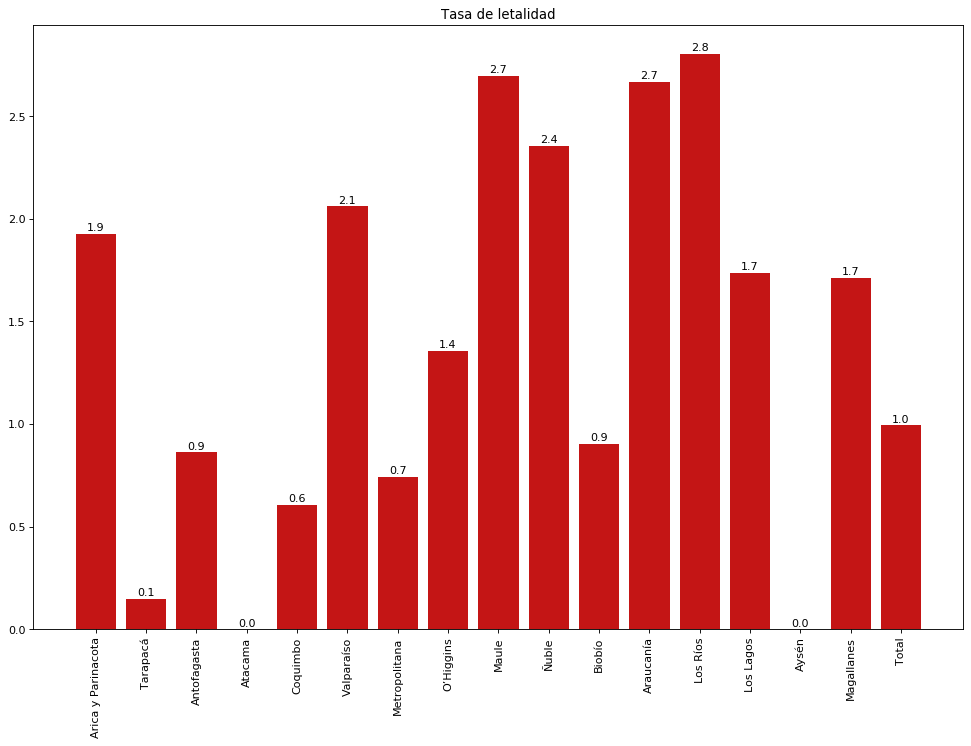

In [13]:
def labelonbars(X, Y):
    n       = len(X)
    aux = 0
    for i in range (n):
        number = '{0:.1f}'.format(float(Y[i])).replace(',', '.')
        plt.annotate(
                number, xy=(X[i], Y[i]),
                xytext =(0, 1),
                textcoords="offset points",
                ha ='center', va='bottom',
                size='10')    
            
plt.figure(figsize=(15, 10), dpi=80)
plt.bar(X, Y, color='#C41515')
plt.title("Tasa de letalidad")
labelonbars(X, Y)
plt.xticks(X, rotation='vertical')
plt.show()